<a href="https://colab.research.google.com/github/dhiraj0806/Flood-Prediction/blob/main/Flood_Prediction(PBL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv('kerala.csv')

In [ ]:
print(ds)

    SUBDIVISION  YEAR   JAN   FEB  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0        KERALA  1901  28.7  44.7  ...  350.8   48.4            3248.6     YES
1        KERALA  1902   6.7   2.6  ...  158.3  121.5            3326.6     YES
2        KERALA  1903   3.2  18.6  ...  157.0   59.0            3271.2     YES
3        KERALA  1904  23.7   3.0  ...   33.9    3.3            3129.7     YES
4        KERALA  1905   1.2  22.3  ...   74.4    0.2            2741.6      NO
..          ...   ...   ...   ...  ...    ...    ...               ...     ...
113      KERALA  2014   4.6  10.3  ...   99.5   47.2            3046.4     YES
114      KERALA  2015   3.1   5.8  ...  223.6   79.4            2600.6      NO
115      KERALA  2016   2.4   3.8  ...  125.4   23.6            2176.6      NO
116     KERALA   2017   1.9   6.8  ...   92.5   38.1            2117.1      NO
117      KERALA  2018  29.1  52.1  ...  125.4   65.1            4473.0     YES

[118 rows x 16 columns]


In [ ]:
ds = ds.drop(['SUBDIVISION','YEAR'] , axis=1)

In [ ]:
print(ds)

      JAN   FEB   MAR    APR  ...    NOV    DEC   ANNUAL RAINFALL  FLOODS
0    28.7  44.7  51.6  160.0  ...  350.8   48.4            3248.6     YES
1     6.7   2.6  57.3   83.9  ...  158.3  121.5            3326.6     YES
2     3.2  18.6   3.1   83.6  ...  157.0   59.0            3271.2     YES
3    23.7   3.0  32.2   71.5  ...   33.9    3.3            3129.7     YES
4     1.2  22.3   9.4  105.9  ...   74.4    0.2            2741.6      NO
..    ...   ...   ...    ...  ...    ...    ...               ...     ...
113   4.6  10.3  17.9   95.7  ...   99.5   47.2            3046.4     YES
114   3.1   5.8  50.1  214.1  ...  223.6   79.4            2600.6      NO
115   2.4   3.8  35.9  143.0  ...  125.4   23.6            2176.6      NO
116   1.9   6.8   8.9   43.6  ...   92.5   38.1            2117.1      NO
117  29.1  52.1  48.6  116.4  ...  125.4   65.1            4473.0     YES

[118 rows x 14 columns]


In [ ]:
ds.shape

(118, 14)

In [ ]:
print(ds.FLOODS.value_counts())

YES    60
NO     58
Name: FLOODS, dtype: int64


In [ ]:
ds.corr()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
JAN,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344
OCT,-0.035044,0.053133,-0.023066,0.113172,0.197102,0.001156,0.025223,-0.181496,-0.032348,1.000000,-0.024060,-0.039067,0.205861


In [ ]:
ds.apply(lambda x:sum(x.isnull()), axis = 0)

JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [ ]:
ds['FLOODS'].replace(['YES', 'NO'], [1, 0], inplace = True)

In [ ]:
X = ds.iloc[:,:-1]         #independent variable
print(X)

      JAN   FEB   MAR    APR  ...    OCT    NOV    DEC   ANNUAL RAINFALL
0    28.7  44.7  51.6  160.0  ...  266.9  350.8   48.4            3248.6
1     6.7   2.6  57.3   83.9  ...  358.4  158.3  121.5            3326.6
2     3.2  18.6   3.1   83.6  ...  354.1  157.0   59.0            3271.2
3    23.7   3.0  32.2   71.5  ...  328.1   33.9    3.3            3129.7
4     1.2  22.3   9.4  105.9  ...  383.5   74.4    0.2            2741.6
..    ...   ...   ...    ...  ...    ...    ...    ...               ...
113   4.6  10.3  17.9   95.7  ...  355.5   99.5   47.2            3046.4
114   3.1   5.8  50.1  214.1  ...  308.1  223.6   79.4            2600.6
115   2.4   3.8  35.9  143.0  ...  225.9  125.4   23.6            2176.6
116   1.9   6.8   8.9   43.6  ...  192.4   92.5   38.1            2117.1
117  29.1  52.1  48.6  116.4  ...  356.1  125.4   65.1            4473.0

[118 rows x 13 columns]


In [ ]:
y = ds.iloc[:,-1]         #dependent variable
print(y)

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64


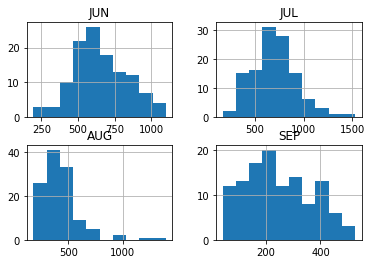

In [ ]:
%matplotlib inline                           
c = ds[['JUN', 'JUL', 'AUG', 'SEP']]         
c.hist()
plt.show()

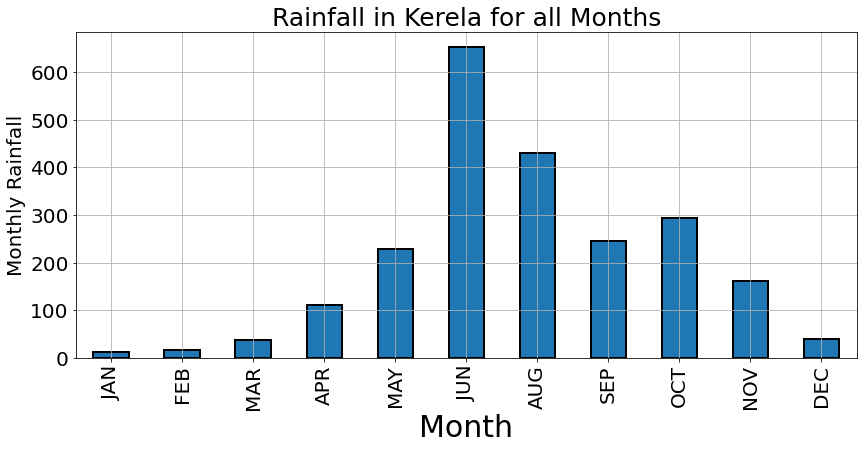

In [ ]:
ax = ds[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

Due to the wide distribution of the dataset we scale the data in the range 0 to 1

In [ ]:
from sklearn import preprocessing     
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit_transform(X)

array([[0.34371257, 0.56582278, 0.23721787, ..., 0.95570189, 0.2388724 ,
        0.49072457],
       [0.08023952, 0.03291139, 0.26347305, ..., 0.37952709, 0.60039565,
        0.52316779],
       [0.03832335, 0.23544304, 0.01381852, ..., 0.37563604, 0.29129575,
        0.50012478],
       ...,
       [0.02874251, 0.04810127, 0.16490097, ..., 0.28105358, 0.11622156,
        0.0448382 ],
       [0.02275449, 0.08607595, 0.04053432, ..., 0.18258007, 0.18793274,
        0.02008984],
       [0.34850299, 0.65949367, 0.22339936, ..., 0.28105358, 0.3214639 ,
        1.        ]])

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
106,0.5,5.6,7.3,138.5,192.7,705.9,966.3,489.6,526.7,357.2,87.4,11.9,3489.6
11,1.9,15.0,11.2,122.7,217.3,948.2,833.6,534.4,136.8,469.5,138.7,22.0,3451.3
6,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1
110,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,3035.1
33,74.5,1.7,47.7,92.4,106.7,852.9,415.0,337.2,48.4,335.9,93.4,4.9,2410.7


In [ ]:
X_test.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
63,1.1,7.8,67.2,83.3,94.8,379.4,754.2,548.0,398.2,325.7,191.7,17.8,2869.1
100,16.5,28.3,7.0,238.0,238.6,715.3,598.5,361.3,216.8,319.6,181.0,10.1,2931.1
22,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6,3484.7
65,3.0,6.9,67.7,167.4,95.2,496.2,601.9,202.1,293.2,392.3,245.4,50.5,2621.7
116,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1


In [ ]:
y_train.head()

106    1
11     1
6      1
110    1
33     0
Name: FLOODS, dtype: int64

In [ ]:
y_test.head()

63     0
100    0
22     1
65     0
116    0
Name: FLOODS, dtype: int64

**1. KNN CLASSIFIER**

In [ ]:
from sklearn import neighbors

In [ ]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(X_train,y_train)

In [ ]:
y_predict = knn_clf.predict(X_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1]


In [ ]:
print("actual values of floods:")
print(y_test)

actual values of floods:
63     0
100    0
22     1
65     0
116    0
28     1
41     1
5      0
18     1
64     0
52     0
114    0
23     1
55     0
115    0
111    0
90     1
42     1
70     1
45     1
89     0
16     0
113    1
46     1
Name: FLOODS, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn_clf,X_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)
knn_accuracy.mean()

0.8333333333333334

**2. Logistic Regression**

In [ ]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(X_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,X_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [ ]:
lr_accuracy.mean()

0.75

In [ ]:
y_predict = lr_clf.predict(X_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1]


In [ ]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 79.166667
recall score: 81.818182
roc score: 79.370629


**3. DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,X_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([1.        , 0.96774194, 0.96774194])

In [ ]:
y_pred = dtc_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1]


In [ ]:
print("actual values:")
print(y_test.values)

actual values:
[0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:95.833333
recall score:100.000000
roc score:96.153846


**4. Random Forest Classification**




In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_clf = rmf.fit(X_train,y_train)
rmf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rmf_clf_acc = cross_val_score(rmf_clf,X_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)

In [ ]:
rmf_clf_acc

array([1.        , 0.96774194, 1.        ])

In [ ]:
y_pred = rmf_clf.predict(X_test)

In [ ]:
print(y_pred)

[0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:95.833333
recall score:100.000000
roc score:96.153846


**5. Enseble Learning**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [ ]:
voting_clf = voting.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.75
RandomForestClassifier 0.8333333333333334
KNeighborsClassifier 0.9583333333333334
VotingClassifier 0.9583333333333334


In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver = 'liblinear', random_state=42)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 10,random_state=42)))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.958333
1   LR  0.750000
2   DT  0.958333
3   RF  0.833333
4   EL  0.958333


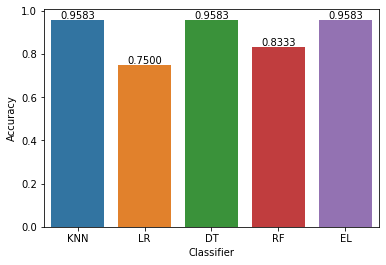

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()